<H1 style="background-color:DodgerBlue;">Binary Prediction of Poisonous Mushrooms</H1>

![Poisonous Mushrooms](https://www.pexels.com/photo/beautiful-but-poisonous-mushrooms-13977301/)

Our goal in this competition is to predict whether a mushroom is poisonous represented by 'p' or edible which is represented by 'e'.







## Library Imports

In [1]:
%pip install requests
%pip install tabulate
%pip install future

# Required for plotting:
%pip install matplotlib

!sudo apt update
!sudo apt install openjdk-11-jdk



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Get:1 https://download.docker.com/linux/ubuntu focal InRelease [57.7 kB]
Get:2 https://cli.github.com/packages stable InRelease [3917 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease                       
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]      

In [2]:
%pip install catboost
%pip install optuna
%pip install optuna_distributed
%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
%pip install h2o
%pip install -Uqq fastbook
%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
#ip install --upgrade pip


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note

In [3]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from pathlib import Path
import os


from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,mean_squared_error, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score



#transformers and pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv





import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from optuna.samplers import TPESampler
import warnings


matplotlib.rc('image', cmap='Greys')

from fastkaggle import setup_comp



from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

import h2o
from h2o.automl import H2OAutoML

import gc

from xgboost import plot_importance

#from IPython.display import FileLink

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
#! mkdir ~/.kaggle

#! cp kaggle.json ~/.kaggle/

#!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#comp = 'playground-series-s4e8'

#path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')


In [6]:
!ls

main.py			playground-series-s4e8.zip	    requirements.txt
playground-series-s4e8	poisonous_mushrooms_classification


In [2]:
path = Path('playground-series-s4e8/')
path

Path('playground-series-s4e8')

In [3]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [4]:
train_df.shape,test_df.shape

((3116945, 21), (2077964, 20))

In [5]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a


Add NaN value to the stem-height column in the train set

In [9]:
# Make a copy of the training dataframe to avoid modifying the original
train_df_with_nan = train_df.copy()

# Add a NaN value to a random row in the 'stem-height' column
random_index = np.random.choice(train_df_with_nan.index)
train_df_with_nan.loc[random_index, 'stem-height'] = np.nan

# Verify the NaN was added
print(train_df_with_nan['stem-height'].isna().sum())

1


## Subset

In [11]:
train_subset = train_df.sample(n=1000000,replace=False)
test_subset = test_df.sample(n=500000,replace=False)

# Full Dataset

#### With original features

In [10]:
cont_names,cat_names = cont_cat_split(train_df_with_nan, dep_var='class')
len(cat_names),len(cont_names)

(17, 3)

In [11]:
cont_names

['cap-diameter', 'stem-height', 'stem-width']

In [12]:
cat_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [13]:
train_df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

Below, i use fastai's RandomSplitter to divide my dataset into a train and validation set, in this example it creates a validation set with 20% of the training dataset.


In [14]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df_with_nan))

Below i build a TabularPandas Object which is a subclass of the Tabular class that has methods we can use to handle tabular data preparation and preprocessing.

This object takes in arguments where i define my training dataset and preprocessing steps i.e. Categorify, FillMissing,Normalize.

We also define our categorical and continuous variables resulting from the cont_cat_split.
Furthermore, i define my Target variable, the y which in this case is Response, y_block represents the type of problem.

Lastly we have the splits argument which was defined above and represents the dataset split.

In [15]:
to = TabularPandas(train_df_with_nan, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='class',
                   y_block=CategoryBlock(),
                   splits=splits)

In [16]:
to.xs.iloc[:2]

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,cap-diameter_na,stem-height_na,cap-diameter,stem-height,stem-width
id,,,,,,,,,,,,,,,,,,,,,,
547711,72,60,62,9,45,0,49,0,0,56,0,0,6,19,23,30,1,1,1,-0.948561,-0.851246,-1.081126
303590,72,56,64,9,53,0,60,0,59,56,20,22,19,28,0,26,3,1,1,0.451292,0.741772,0.548564


In [17]:
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

Dealing with missing values present in the test set column for stem-height yet not there in the training set

In [13]:
#test_df = test_df.fillna(0)

#modify to only nan the values in the stem-height

In [18]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [19]:
dls.show_batch()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,cap-diameter_na,stem-height_na,cap-diameter,stem-height,stem-width,class
0,b,y,n,f,#na#,c,k,#na#,#na#,w,#na#,#na#,f,f,#na#,d,u,False,False,3.12,6.73,3.08,e
1,b,g,n,f,a,d,g,#na#,#na#,n,#na#,#na#,f,f,#na#,d,u,False,False,4.74,5.53,3.26,e
2,s,#na#,e,t,d,c,w,#na#,#na#,n,#na#,#na#,f,f,#na#,d,u,False,False,6.54,6.62,6.70,p
3,c,#na#,n,f,f,f,f,#na#,#na#,n,#na#,#na#,f,f,#na#,d,s,False,False,6.12,5.80,21.25,e
4,b,t,y,f,#na#,c,k,#na#,#na#,n,#na#,#na#,t,f,#na#,m,a,False,False,0.92,3.60,2.68,p
5,x,g,n,f,d,d,n,#na#,s,n,#na#,#na#,f,f,#na#,h,u,False,False,1.59,2.16,2.59,p
6,x,s,n,t,p,#na#,y,c,#na#,y,#na#,#na#,f,f,#na#,d,u,False,False,13.99,8.33,31.09,p
7,x,y,w,f,e,c,p,#na#,#na#,w,#na#,w,t,e,#na#,g,u,False,False,8.58,5.40,13.31,e
8,b,#na#,g,f,a,#na#,n,#na#,#na#,g,#na#,w,f,f,k,g,a,False,False,2.93,9.05,2.47,p
9,x,y,w,t,#na#,#na#,p,s,#na#,w,#na#,#na#,t,l,#na#,g,u,False,False,7.79,8.07,14.70,p


In [20]:
import torch
print(torch.cuda.is_available())
#print(torch.cuda.current_device())

False


# AutoGluon

In [19]:
metric = 'matthews_corrcoef'

In [44]:
from autogluon.tabular.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef_scorer = make_scorer('matthews_corrcoef', matthews_corrcoef)

predictor = TabularPredictor(label='class', eval_metric=matthews_corrcoef_scorer).fit(train_data=train_df_with_nan)

ModuleNotFoundError: No module named 'autogluon.tabular.metrics'

In [34]:
#from autogluon.tabular.metrics import matthews_corrcoef
predictor = TabularPredictor(label='class', eval_metric=matthews_corrcoef).fit(train_data=train_df_with_nan)

ModuleNotFoundError: No module named 'autogluon.tabular.metrics'

In [21]:
%%time
predictor = TabularPredictor(label='class',eval_metric=matthews_corrcoef).fit(train_data=train_df_with_nan)

No path specified. Models will be saved in: "AutogluonModels/ag-20240802_085711"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #70~20.04.1-Ubuntu SMP Fri Jun 14 15:42:13 UTC 2024
CPU Count:          4
Memory Avail:       10.01 GB / 15.34 GB (65.2%)
Disk Space Avail:   355.18 GB / 387.48 GB (91.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : 

AttributeError: 'function' object has no attribute 'name'

In [22]:
%%time
predictions = predictor.predict(test_df)
predictions

NameError: name 'predictor' is not defined

In [ ]:
print(predictor.fit_summary())

# h2o

In [23]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu320.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu320.04, mixed mode, sharing)
  Starting server from /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpracn5cwd
  JVM stdout: /tmp/tmpracn5cwd/h2o_zeus_started_from_python.out
  JVM stderr: /tmp/tmpracn5cwd/h2o_zeus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_zeus_6y5r21
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.836 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [24]:
train_data = h2o.H2OFrame(train_df_with_nan)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
train_data['class'] = train_data['class'].asfactor()

In [26]:
aml = H2OAutoML(max_runtime_secs=3600,seed=42)
aml.train(y='class', training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),6/12
# GBM base models (used / total),2/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


In [27]:
leaderboard = aml.leaderboard
print(leaderboard)
best_model = aml.leader
print(best_model)

model_id                                                     auc    logloss     aucpr    mean_per_class_error       rmse         mse
StackedEnsemble_AllModels_2_AutoML_1_20240802_90049     0.997161  0.036343   0.997509              0.00758957  0.0838339  0.00702813
StackedEnsemble_AllModels_1_AutoML_1_20240802_90049     0.997158  0.0363646  0.997514              0.00761568  0.0838504  0.0070309
StackedEnsemble_BestOfFamily_3_AutoML_1_20240802_90049  0.997148  0.0364511  0.997515              0.00762703  0.0839293  0.00704412
StackedEnsemble_BestOfFamily_4_AutoML_1_20240802_90049  0.997141  0.0364358  0.997485              0.00765643  0.0838904  0.0070376
StackedEnsemble_BestOfFamily_2_AutoML_1_20240802_90049  0.99714   0.0364549  0.997506              0.00769808  0.08392    0.00704256
StackedEnsemble_BestOfFamily_1_AutoML_1_20240802_90049  0.997138  0.0364775  0.997503              0.00762293  0.0839579  0.00704893
GBM_1_AutoML_1_20240802_90049                           0.997076  0.036

In [28]:
df_test = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
predictions = best_model.predict(df_test)
predictions_df = predictions.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [40]:
preds = aml.predict(df_test)

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


In [41]:
preds.shape

(2077964, 3)

In [37]:
predictions.shape

(2077964, 3)

In [42]:
predicted_classes = predictions['predict']
predicted_classes

predict
e
p
p
p
e
e
e
p
p
e


In [38]:
predictions

predict,e,p
e,0.997768,0.00223199
p,0.00214219,0.997858
p,0.00598628,0.994014
p,0.00561322,0.994387
e,0.998488,0.00151205
e,0.988691,0.0113093
e,0.997179,0.00282086
p,0.000751596,0.999248
p,0.00244605,0.997554
e,0.998223,0.00177704


In [30]:
sub_df['Response'] =(predictions_df['predict'].values)

In [49]:
!rm submission.csv

rm: cannot remove 'submission.csv': No such file or directory


In [50]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['class'] = predicted_classes
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

,id,class
0,3116945,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
1,3116946,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2,3116947,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
3,3116948,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
4,3116949,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
...,...,...
2077959,5194904,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2077960,5194905,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2077961,5194906,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2077962,5194907,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n


In [51]:
predicted_classes.shape

(2077964, 1)

In [32]:
sub_df.to_csv('submission.csv', index=False)

In [46]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['class'] = predicted_classes
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

,id,class
0,3116945,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
1,3116946,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2,3116947,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
3,3116948,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
4,3116949,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
...,...,...
2077959,5194904,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2077960,5194905,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2077961,5194906,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n
2077962,5194907,predict\ne\np\np\np\ne\ne\ne\np\np\ne\n[2077964 rows x 1 column]\n


In [47]:
!ls

AutogluonModels		playground-series-s4e8.zip	    submission.csv
main.py			poisonous_mushrooms_classification
playground-series-s4e8	requirements.txt


In [35]:
!kaggle competitions submit -c playground-series-s4e7 -f submission.csv -m "[AutoML Grand Prix] Silver Rubanza, H2O AutoML "

100%|██████████████████████████████████████| 23.8M/23.8M [00:00<00:00, 39.5MB/s]


Successfully submitted to Binary Prediction of Poisonous Mushrooms

# Exploratory Data Analysis

Below are the feature descriptions as described in this [notebook](https://www.kaggle.com/code/satyaprakashshukl/insurance-boost-analysis)

Gender: Categorical variable indicating the gender of the customer.

Age: Numeric variable indicating the age of the customer.

Driving_License: Binary variable indicating if the customer has a driving license (1 if yes, 0 if no).

Region_Code: Numeric variable indicating the region code of the customer.

Previously_Insured: Binary variable indicating if the customer was previously insured (1 if yes, 0 if no).

Vehicle_Age: Categorical variable indicating the age of the vehicle.

Vehicle_Damage: Categorical variable indicating if the vehicle was damaged in the past.

Annual_Premium: Numeric variable indicating the annual premium amount.

Policy_Sales_Channel: Numeric variable indicating the sales channel of the policy.

Vintage: Numeric variable indicating the number of days the customer has been associated with the company.

Response: Binary target variable indicating if the customer responded positively to the automobile insurance offer (1 if yes, 0 if no).

### Summary Statistics

In [24]:
train_df.shape,test_df.shape

((11504798, 11), (7669866, 10))

In [25]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [26]:
cont_names

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [27]:
cat_names

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage']

In [28]:
len(cat_names),len(cont_names)

(5, 5)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


In [30]:
train_df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Null Value Check

In [31]:
train_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [32]:
test_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

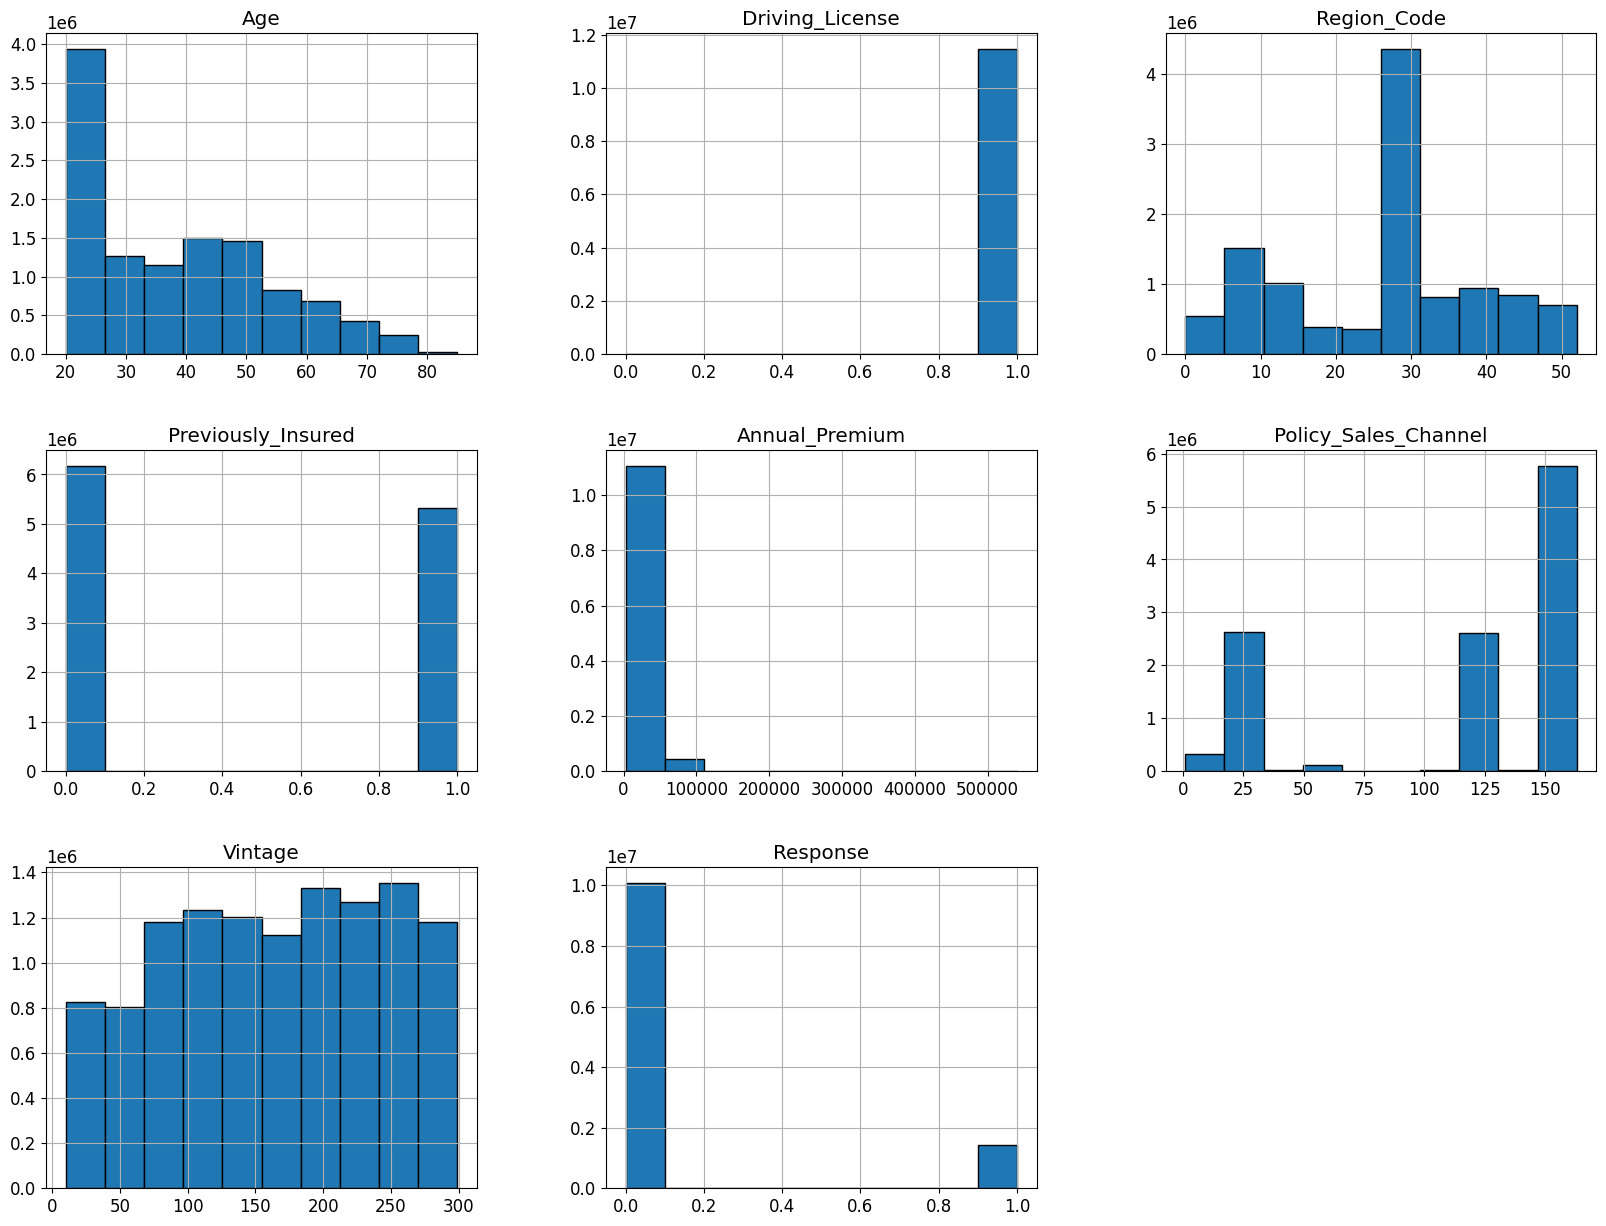

In [33]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [34]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11504798.0,38.383563,14.993459,20.0,24.0,36.0,49.0,85.0
Driving_License,11504798.0,0.998022,0.044431,0.0,1.0,1.0,1.0,1.0
Region_Code,11504798.0,26.418690,12.991590,0.0,15.0,28.0,35.0,52.0
Previously_Insured,11504798.0,0.462997,0.498629,0.0,0.0,0.0,1.0,1.0
Annual_Premium,11504798.0,30461.370411,16454.745205,2630.0,25277.0,31824.0,39451.0,540165.0
Policy_Sales_Channel,11504798.0,112.425442,54.035708,1.0,29.0,151.0,152.0,163.0
Vintage,11504798.0,163.897744,79.979531,10.0,99.0,166.0,232.0,299.0
Response,11504798.0,0.122997,0.328434,0.0,0.0,0.0,0.0,1.0


In [35]:
train_df.describe(include=[object])

,Gender,Vehicle_Age,Vehicle_Damage
count,11504798,11504798,11504798
unique,2,3,2
top,Male,1-2 Year,Yes
freq,6228134,5982678,5783229


### Target

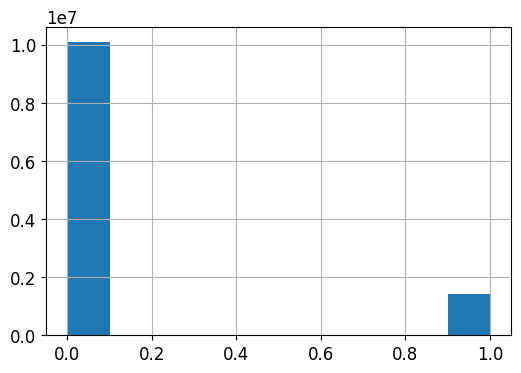

In [36]:
train_df['Response'].hist(figsize=(6,4));

In [37]:
train_df['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [38]:
train_df['Response'].unique()

array([0, 1])

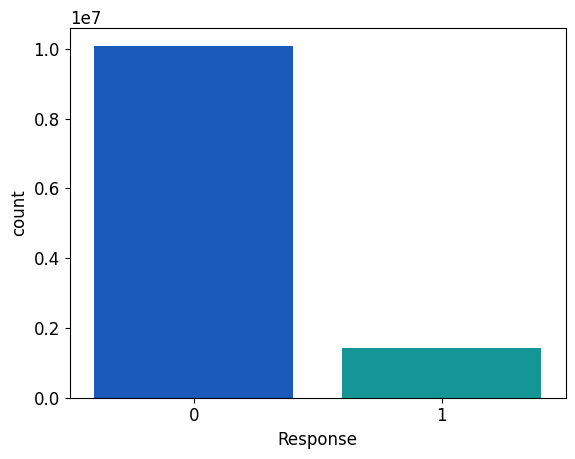

<Figure size 600x400 with 0 Axes>

In [39]:
#barplot
sns.countplot(x='Response', data=train_df, palette='winter')
plt.figure(figsize=(6, 4)) ;
plt.show();

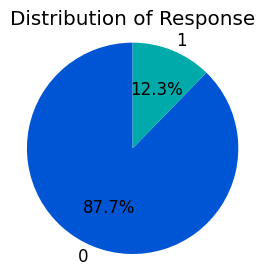

In [40]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Count the occurrences of each response
response_counts = train_df['Response'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
colors = sns.color_palette('winter', n_colors=len(response_counts))
plt.pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Response')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The target variable is imbalanced heavily skewing towards 0 which represents a no.

### Categorical Variables

In [41]:
cat_names

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage']

#### Vehicle Damage

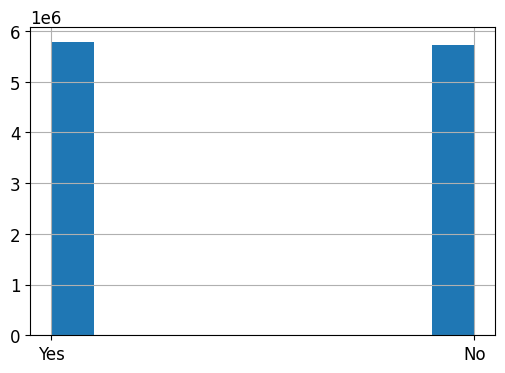

In [42]:
train_df['Vehicle_Damage'].hist(figsize=(6,4));

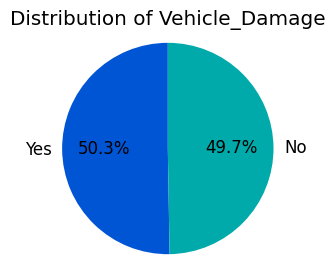

In [43]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Count the occurrences of each response
vd_counts = train_df['Vehicle_Damage'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
colors = sns.color_palette('winter', n_colors=len(vd_counts))
plt.pie(vd_counts.values, labels=vd_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Vehicle_Damage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [44]:
contingency_table = pd.crosstab(train_df['Vehicle_Damage'], train_df['Response'])
print(contingency_table)

Response              0        1
Vehicle_Damage                  
No              5697548    24021
Yes             4392191  1391038


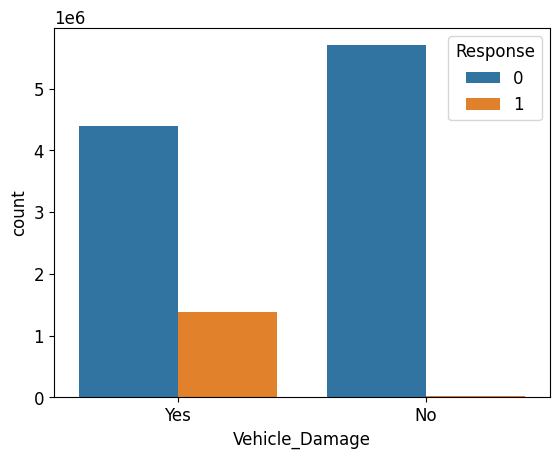

In [45]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=train_df)
plt.show()

#### Gender

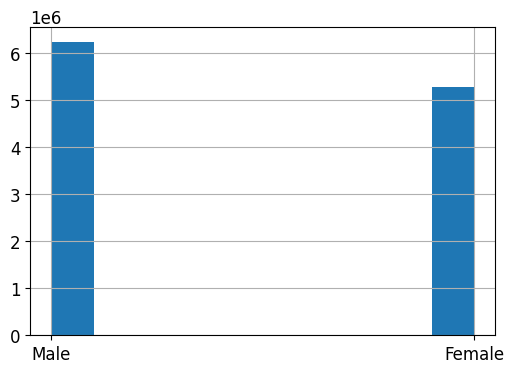

In [46]:
train_df['Gender'].hist(figsize=(6,4));

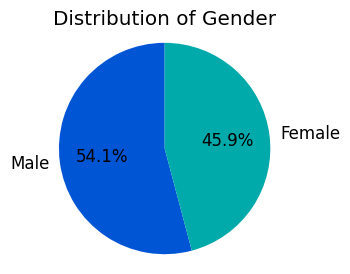

In [47]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Count the occurrences of each response
gender_counts = train_df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
colors = sns.color_palette('winter', n_colors=len(gender_counts))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

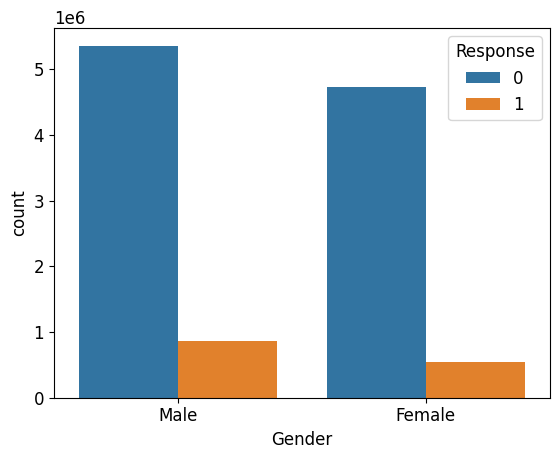

In [48]:
sns.countplot(x='Gender', hue='Response', data=train_df)
plt.show()

### Continous Variables

In [49]:
cont_names

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

#### Age

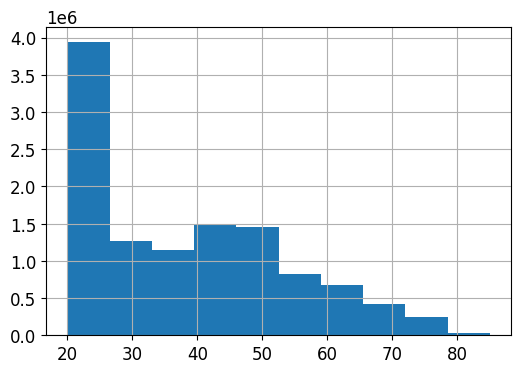

In [50]:
train_df['Age'].hist(figsize=(6,4));

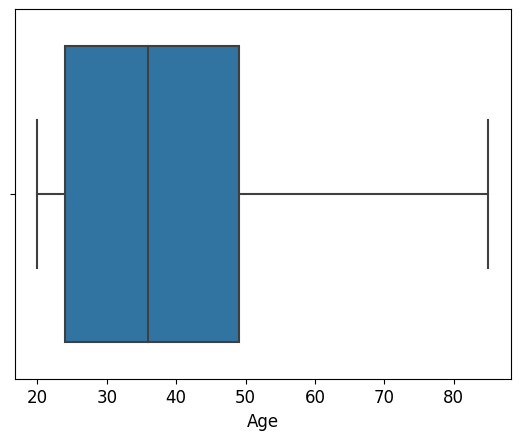

In [51]:
sns.boxplot(x='Age', data=train_df)
plt.show()
plt.close()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

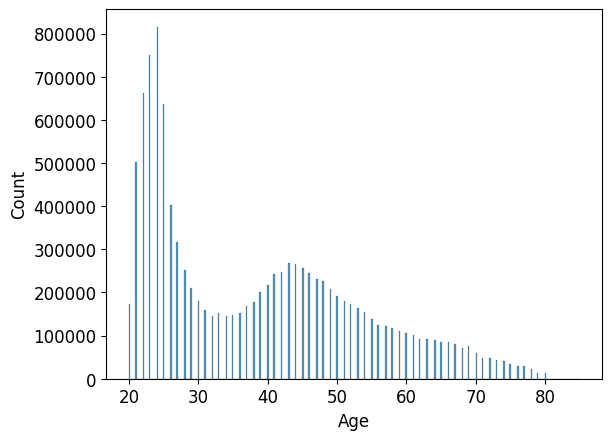

In [52]:
sns.histplot(x = 'Age', data = train_df)

In [53]:
# Change the display options
pd.set_option('display.float_format', '{:.4f}'.format)

# Now run your describe() function
print(train_df['Age'].describe())

count   11504798.0000
mean          38.3836
std           14.9935
min           20.0000
25%           24.0000
50%           36.0000
75%           49.0000
max           85.0000
Name: Age, dtype: float64


In [54]:
pd.reset_option('display.float_format')

In [55]:
train_df.Age.mode()

0    24
Name: Age, dtype: int64

Outlier check

In [56]:
train_df.Age.var()


224.80379804254449

Age and response

### Correlation

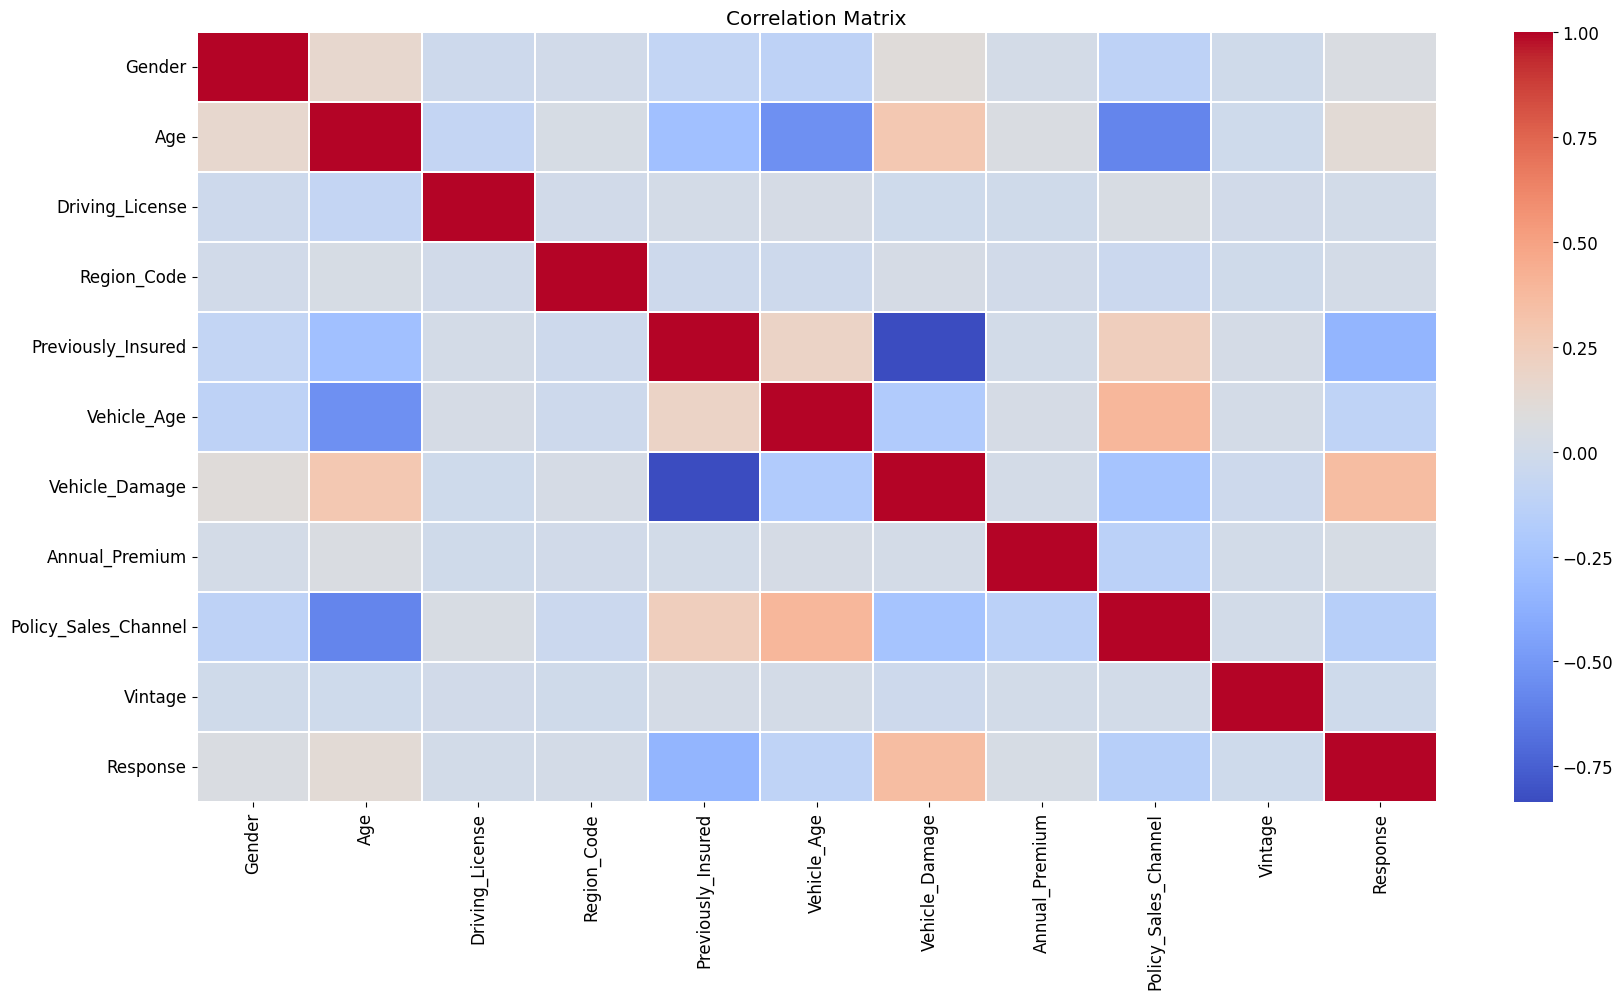

In [57]:
# Extract data from fastai DataLoaders
df = pd.DataFrame(dls.train.dataset.items)

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Replace inf values with NaN if any
#numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create the plot
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

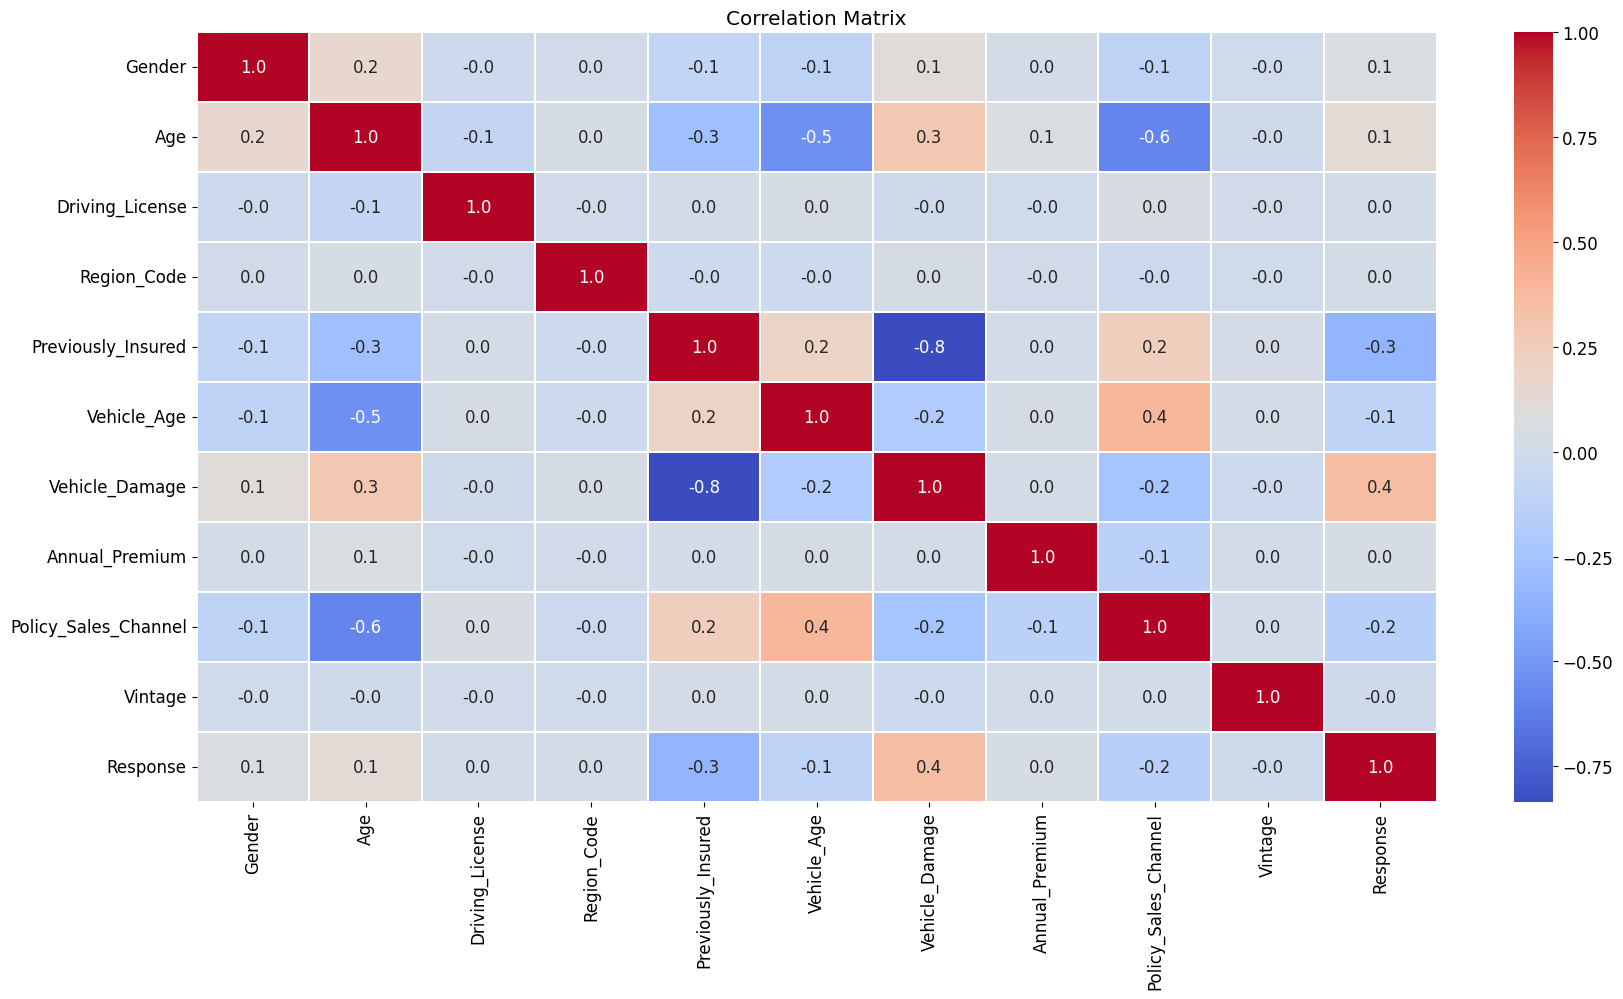

In [58]:
#correlation_matrix = .corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
#plt.gcf().set_facecolor('skyblue')  
plt.title('Correlation Matrix')
plt.show()

#### Theories

From the correlation matrix, i infer that vehicle damage and Age have a heavy influence on the Response.
We notice that people with vehicle damage are way more likely to buy car insuarance.

In [ ]:
dls

In [ ]:
to

In [ ]:
dls.info()

# Neural Network

In [1]:
cat_names = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']
cont_names = []
#cont_names,cat_names = cont_cat_split(train_df, dep_var='Response')
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='Response',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

NameError: name 'RandomSplitter' is not defined

Custom learner

In [147]:
emb_szs = {
    var: int(min(64, round(1.6 * len(to.classes[var]) ** .56)))
    for var in to.cats.columns
}
emb_szs

{'Gender': 3,
 'Age': 17,
 'Driving_License': 3,
 'Region_Code': 15,
 'Previously_Insured': 3,
 'Vehicle_Age': 3,
 'Vehicle_Damage': 3,
 'Annual_Premium': 64,
 'Policy_Sales_Channel': 27,
 'Vintage': 38}

In [148]:
learn = tabular_learner(
    dls,
    emb_szs=emb_szs,
    layers=[200, 100],
    config=dict(ps=[0.3, 0.3],embed_p=0.3),
    metrics=RocAucBinary())

In [149]:
learn.load('/kaggle/input/fastai_nn/pytorch/default/1/nn_model')

RuntimeError: Error(s) in loading state_dict for TabularModel:
	size mismatch for embeds.7.weight: copying a param with shape torch.Size([50813, 64]) from checkpoint, the shape in current model is torch.Size([50847, 64]).

In [34]:
!ls models

In [36]:
!ls /kaggle/input/fastai_nn/pytorch/default/1

nn_model.pth


In [21]:
learn.lr_find(suggest_funcs=(slide,valley))

NameError: name 'learn' is not defined

In [34]:
%%time
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.248976,0.249359,0.886374,02:04
1,0.243485,0.247016,0.888117,02:01
2,0.242467,0.246280,0.888656,02:00
3,0.241116,0.246100,0.888574,02:01
4,0.241934,0.245932,0.889005,01:59
5,0.241608,0.245649,0.888993,01:59
6,0.237282,0.246175,0.888836,01:59
7,0.241146,0.246368,0.888654,02:00
8,0.236905,0.246283,0.888744,01:59
9,0.237568,0.246329,0.888773,01:59


CPU times: user 19min 54s, sys: 10.8 s, total: 20min 5s
Wall time: 20min 7s


SuggestedLRs(slide=0.02754228748381138, valley=0.0020892962347716093)

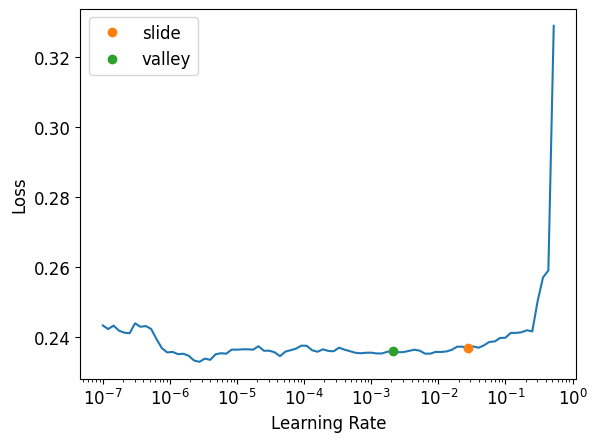

In [35]:
learn.lr_find(suggest_funcs=(slide,valley))

SuggestedLRs(valley=2.511886486900039e-05)

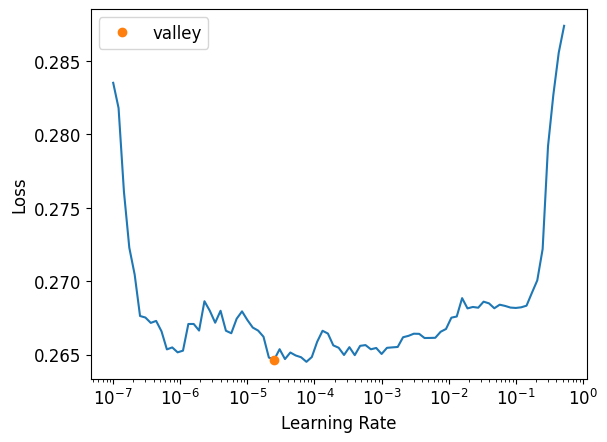

In [34]:
learn.lr_find()

In [35]:
%%time
learn.fit_one_cycle(10,1e-4)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.263791,0.263827,0.859386,01:53
1,0.262624,0.263845,0.859359,01:53
2,0.265786,0.263799,0.859438,01:52
3,0.264483,0.263806,0.859609,01:53
4,0.264135,0.263752,0.859599,01:53
5,0.265782,0.263736,0.859739,01:53
6,0.266668,0.263707,0.859734,01:52
7,0.265709,0.263611,0.859795,01:53
8,0.264767,0.263612,0.859839,01:53
9,0.262967,0.263598,0.859860,01:53


CPU times: user 18min 39s, sys: 9.11 s, total: 18min 48s
Wall time: 18min 51s


In [38]:
preds, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
final_preds = preds[:, 1]
final_preds

tensor([6.1688e-03, 5.6555e-01, 2.1447e-01,  ..., 9.1205e-04, 4.7635e-01, 3.1233e-04])

In [37]:
final_preds.shape,preds.shape

(torch.Size([7669866]), torch.Size([7669866, 2]))

In [40]:
preds,targets = learn.get_preds(dl=test_dl,with_decoded=True)

ValueError: too many values to unpack (expected 2)

In [39]:
nn_preds_proba = preds[:,1]
nn_preds_proba

tensor([6.1688e-03, 5.6555e-01, 2.1447e-01,  ..., 9.1205e-04, 4.7635e-01, 3.1233e-04])

In [41]:
dl = test_dl
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba_b = (a_preds[:, 1])

In [42]:
nn_preds_testing = learn.get_preds()[0]

In [50]:
nn_preds_testing = learn.get_preds()[0]
nn_preds_testing = nn_preds_testing[:, 1]
nn_preds_testing.shape

torch.Size([2300959])

In [47]:
X_test.shape,nn_preds_proba.shape,nn_preds_proba_b.shape,nn_preds_testing.shape,nn_preds_x.shape,nn_preds_y.shape

((2300959, 10),
 torch.Size([7669866]),
 torch.Size([7669866]),
 torch.Size([2300959, 2]),
 torch.Size([2300959, 2]),
 torch.Size([7669866, 2]))

In [ ]:
test_dl = dls.test_dl(X_test)

In [51]:
nn_score = roc_auc_score(y_test,nn_preds_testing)
nn_score

0.8887732466948651

#### Ensemble

In [53]:
def ensemble():
    learn = tabular_learner(dls,emb_szs=emb_szs,layers=[200, 100],config=dict(ps=[0.3, 0.3],embed_p=0.3),metrics=RocAucBinary())
    with learn.no_bar(),learn.no_logging(): learn.fit(5, 1e-3)
    preds, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
    #preds_b, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
    return preds[:, 1],preds_b[:, 1]

In [ ]:
nn_preds_testing = learn.get_preds()[0]
nn_preds_testing = nn_preds_testing[:, 1]

In [54]:
%%time
learns = [ensemble() for _ in range(5)]

In [55]:
ens_preds = torch.stack(learns).mean(0)

In [56]:
ens_preds

tensor([3.8309e-03, 6.2528e-01, 2.4289e-01,  ..., 2.4612e-04, 5.9650e-01, 1.5149e-04])

In [59]:
ens_preds.shape,test_df.shape

(torch.Size([7669866]), (7669866, 10))

In [65]:
ens_preds_testing = learn.get_preds()[0]

In [67]:
ens_preds_testing = ens_preds_testing[:, 1]
ens_preds_testing.shape

torch.Size([2300959])

In [68]:
nn_preds_testing

tensor([0.0189, 0.0572, 0.0464,  ..., 0.0875, 0.3518, 0.4389])

In [69]:
ens_preds_testing

tensor([0.0189, 0.0572, 0.0464,  ..., 0.0875, 0.3518, 0.4389])

In [70]:
nn_score = roc_auc_score(y_test,ens_preds_testing)
nn_score

0.8887732466948651

In [62]:
y_test.shape

(2300959,)

In [60]:
test_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...
19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63


In [63]:
learn

In [64]:
learns

[tensor([5.2234e-03, 5.7519e-01, 2.3516e-01,  ..., 3.7642e-04, 5.6876e-01, 2.0517e-04]),
 tensor([2.3106e-03, 6.1589e-01, 2.3097e-01,  ..., 1.9352e-04, 5.9109e-01, 2.0172e-04]),
 tensor([3.7830e-03, 5.9247e-01, 2.6526e-01,  ..., 3.0145e-04, 6.6120e-01, 8.4567e-05]),
 tensor([3.5276e-03, 6.6439e-01, 2.4047e-01,  ..., 1.2023e-04, 5.4274e-01, 1.4216e-04]),
 tensor([4.3101e-03, 6.7848e-01, 2.4260e-01,  ..., 2.3899e-04, 6.1870e-01, 1.2385e-04])]

In [71]:
learn.save('nn_model')  # Saves the model to a folder named 'my_model'


Path('models/nn_model.pth')

In [74]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = ens_preds
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

,id,Response
0,11504798,0.003831
1,11504799,0.625285
2,11504800,0.242891
3,11504801,0.000209
4,11504802,0.158190
...,...,...
7669861,19174659,0.199597
7669862,19174660,0.000595
7669863,19174661,0.000246
7669864,19174662,0.596499


In [72]:
learns.save('nn_model')  # Saves the model to a folder named 'my_model'


AttributeError: 'list' object has no attribute 'save'

In [58]:
nn_score = roc_auc_score(train_df,ens_preds)
nn_score

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
t

In [ ]:
test_df.shape

In [ ]:
preds, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
final_preds = preds[:, 1]

Default learner

In [24]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.019054606556892395, valley=0.001737800776027143)

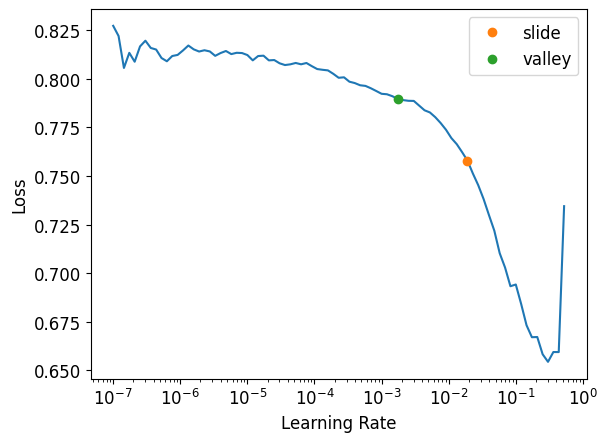

In [25]:
learn.lr_find(suggest_funcs=(slide,valley))

In [ ]:
%%time
learn.fit_one_cycle(8,0.005)


epoch,train_loss,valid_loss,roc_auc_score,time


In [ ]:
dl = test_dl
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [ ]:
preds,targets = learn.get_preds(dl=dl,with_decoded=True)

In [ ]:
nn_preds_proba = preds[:,1]
nn_

In [ ]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = nn_preds_proba
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

# Neural Network Ensemble

In [ ]:
def ensemble():
    learn = tabular_learner(dls, metrics=RocAucBinary())
    with learn.no_bar(),learn.no_logging(): learn.fit(5, 0.005)
    return learn.get_preds(test_dl=test_dl)[0]

In [ ]:
learns = [ensemble() for _ in range(5)]

In [ ]:
ens_preds = torch.stack(learns).mean(0)

# Random Forest

In [ ]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
%%time
#After dropping Driving_License column
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
%%time
#After dropping Driving_License,Gender column
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
%%time
#After dropping Driving_License,Gender,Vehicle_Age column
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
#RandomForestClassifier??

## Feature Importance

In [ ]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);
     

#### Investigate effect of dropping columns

In [ ]:
# Dropping a single column
train_subset = train_subset.drop('Driving_License', axis=1)

# Dropping multiple columns
#train_subset_new = train_subset.drop(['Driving_License', 'Gender', 'Vehicle_Age'], axis=1)

In [ ]:
# Dropping a single column
train_subset = train_subset.drop('Gender', axis=1)


In [ ]:
# Dropping a single column
train_subset = train_subset.drop('Vehicle_Age', axis=1)


In [ ]:
train_subset.shape

In [ ]:
train_subset.columns

# Gradient Boosting

# XGBoost

In [33]:
print(xgb.get_config())

{'use_rmm': False, 'verbosity': 1}


In [60]:
xgb_params = {
              
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'n_estimators': 1500,       
    'learning_rate': 0.55,                   
    'min_child_weight': 17,      
    'reg_lambda': 0.2,           
    'reg_alpha': 7,              
    'max_bin': 52000,            
    'colsample_bytree': 0.65,    
    'max_delta_step': 2,         
    #'random_state': 0,
    #'device' : 'gpu',
    'device' : 'cuda',
    'tree_method': 'hist'
}


In [52]:
params_xgb = {
              
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'n_estimators': 5000,       
    'learning_rate': 0.55,                   
    'min_child_weight': 17,      
    'reg_lambda': 0.2,           
    'reg_alpha': 7,              
    'max_bin': 52000,            
    'colsample_bytree': 0.65,    
    'max_delta_step': 2,         
    #'random_state': 0,
    #'device' : 'cuda',
    #'devices': '0:1',
    'tree_method': 'hist'
}


In [53]:
%%time
xgb_model = xgb.XGBClassifier(**params_xgb)
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 22min 19s, sys: 1.11 s, total: 22min 21s
Wall time: 11min 14s


0.9967756665918146

In [85]:
test_pred_binary = (xgb_preds > 0.5).astype(int)

test_pred_class = le.inverse_transform(xgb_preds)

AttributeError: 'Tensor' object has no attribute 'astype'

In [74]:
xgb_preds.shape

torch.Size([2077964])

In [59]:
xgb_model.save_model('xgb_model.json')


In [65]:
xgb_score = matthews_corrcoef(y_test,xgb_preds_x)
xgb_score

0.9834766342107844

In [75]:
!rm submission.csv
!ls

AutogluonModels		playground-series-s4e8.zip	    xgb_model.json
main.py			poisonous_mushrooms_classification
playground-series-s4e8	requirements.txt


In [36]:
xgb_score

0.8914620346880495

In [63]:
import gc
gc.collect()

34010

In [83]:
!rm submission.csv

In [84]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['class'] = xgb_preds
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

,id,class
0,3116945,0
1,3116946,1
2,3116947,1
3,3116948,1
4,3116949,0
...,...,...
2077959,5194904,1
2077960,5194905,1
2077961,5194906,1
2077962,5194907,0


In [80]:
!kaggle competitions submit -c playground-series-s4e8 -f submission.csv -m "[XGBOOST] Silver Rubanza, XGB OOST  params_xgb "

100%|██████████████████████████████████████| 19.8M/19.8M [00:00<00:00, 49.5MB/s]


Successfully submitted to Binary Prediction of Poisonous Mushrooms

In [ ]:
!tree

#### XgBoost feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

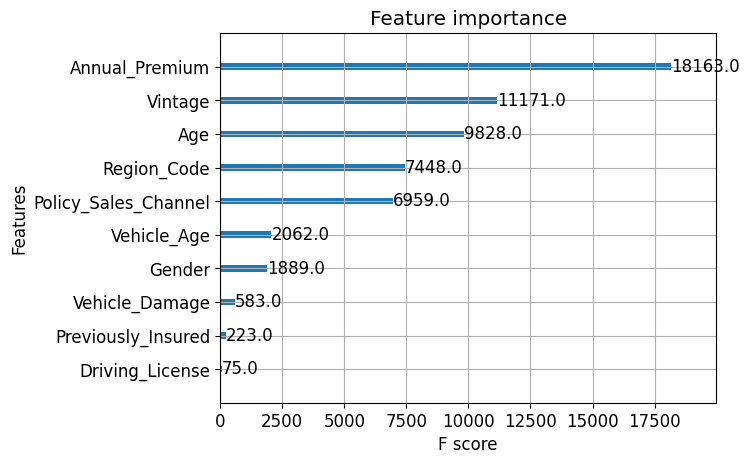

In [64]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

## Optuna

In [ ]:
%%time
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 2000),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 30),  
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'max_bin': trial.suggest_int('max_bin', 40000, 60000),
        'max_delta_step': trial.suggest_int('max_delta_step', 1, 10),
        'device_type': 'gpu'
        
    }

    model =  xgb.XGBClassifier(**params, random_state=0)
    
    # Cross-validation with 5 folds using KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    
    # We maximize accuracy, so we return the mean accuracy of the cross-validation
    return np.mean(cv_results)

study = optuna.create_study(sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0), direction="maximize")
study.optimize(objective, n_trials=100)

print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

In [ ]:
print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

### Cross validation implementation

In [54]:
%%time

K_FOLDS = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# This part is just to demonstrate how the indices work
for train_index, test_index in kfold.split(train_df):
    print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

fold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    Xgb_model_fold = xgb.XGBClassifier(**params_xgb)
    Xgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on the validation set for the current fold
    y_pred_fold = Xgb_model_fold.predict_proba(X_fold_val)[:, 1]
    y_pred_fold_tt = Xgb_model_fold.predict_proba(test_dl.xs)[:, 1]
    
    # Calculate and store the AUC-ROC score for the current fold
    score = matthews_corrcoef(y_fold_val, y_pred_fold)
    fold_scores.append(score)

# Calculate the average score across all folds
avg_score = np.mean(fold_scores)
print(f"Average AUC-ROC Score Across All Folds: {avg_score}")

train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
Average AUC-ROC Score Across All Folds: 0.996771942959711
CPU times: user 1h 4min 45s, sys: 3.56 s, total: 1h 4min 49s
Wall time: 32min 36s


In [55]:
y_pred_fold_tt.shape

(2077964,)

In [69]:
score = matthews_corrcoef(y_fold_val, y_pred_fold)
fold_scores.append(score)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = y_pred_fold_tt
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

# LightGBM

In [ ]:
lgbm_params = {'n_estimators': 1190, 'learning_rate': 0.22952000374471332, 'max_depth': 13, 'reg_alpha': 8.200152384535924,
          'reg_lambda': 4.285393733702208, 
          'num_leaves': 100, 'subsample': 0.6497981764924947, 'colsample_bytree': 0.37368304607248115,
               'device_type':'gpu'}

In [56]:
params_lgb = {
    
    'verbose': -1,
    'objective': 'binary',
    "eval_metric": 'auc',
    #'device': 'cuda',
    'n_estimators': 2350,           
    'learning_rate': 0.54,          
    'max_depth': 17,                
    'min_data_in_leaf': 20,        
    'reg_alpha': 6.0,              
    'reg_lambda': 1.5,              
    #'max_bin': 54000,              
    'num_leaves': 60,             
    'min_data_in_bin': 2,              
    'colsample_bytree': 0.3,       
    'random_state': 0,
}

In [66]:
%pip install lightgbm --install-option=--gpu


Usage:   
  /opt/conda/bin/python3.10 -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/conda/bin/python3.10 -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/conda/bin/python3.10 -m pip install [options] [-e] <vcs project url> ...
  /opt/conda/bin/python3.10 -m pip install [options] [-e] <local project path> ...
  /opt/conda/bin/python3.10 -m pip install [options] <archive url/path> ...

no such option: --install-option
Note: you may need to restart the kernel to use updated packages.


In [57]:
params_lgb = {
    
    'verbose': -1,
    'objective': 'binary',
    "eval_metric": 'auc',
    #'device': 'cpu',
    'n_estimators': 2350,           
    'learning_rate': 0.54,          
    'max_depth': 17,                
    'min_data_in_leaf': 20,        
    'reg_alpha': 6.0,              
    'reg_lambda': 1.5,              
    'max_bin': 54000,              
    'num_leaves': 60,             
    'min_data_in_bin': 2,              
    'colsample_bytree': 0.3,       
    'random_state': 0,
}

In [58]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier(**params_lgb)
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_positive_preds = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score_prob = matthews_corrcoef(y_test,lgbm_positive_preds_x)
lgbm_score_prob


CPU times: user 25min 3s, sys: 1.1 s, total: 25min 5s
Wall time: 12min 39s


0.9968891636296414

In [67]:
lgbm_score_prob = matthews_corrcoef(y_test,lgbm_preds_x)
lgbm_score_prob

0.9834701867298028

In [83]:
lgbm_score_prob

0.8911916074717589

In [ ]:
%%time

K_FOLDS = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# This part is just to demonstrate how the indices work
for train_index, test_index in kfold.split(train_df):
    print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

fold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    lgb_model_fold = lgb.LGBMClassifier(**params)
    lgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on the validation set for the current fold
    y_pred_fold = lgb_model_fold.predict_proba(X_fold_val)[:, 1]
    y_pred_fold_tt = lgb_model_fold.predict_proba(test_dl.xs)[:, 1]
    
    # Calculate and store the AUC-ROC score for the current fold
    score = roc_auc_score(y_fold_val, y_pred_fold)
    fold_scores.append(score)

# Calculate the average score across all folds
avg_score = np.mean(fold_scores)
print(f"Average AUC-ROC Score Across All Folds: {avg_score}")

## Hyperparamter optimization with Optuna

In [ ]:
# finetuned optuna code
%%time

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'device_type': 'gpu'
    }
    
    K_FOLDS = 5  # Number of folds for cross-validation
    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

    fold_scores = []
    
    #for train_index, test_index in kfold.split(train_df):
    #print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

    for train_index, val_index in kfold.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Train the model on the current fold
        lgb_model_fold = lgb.LGBMClassifier(**params)  # Use params, not lgbm_params
        lgb_model_fold.fit(X_fold_train, y_fold_train)
        
        # Predict probabilities on the validation set for the current fold
        y_pred_fold = lgb_model_fold.predict_proba(X_fold_val)[:, 1]
        
        # Calculate and store the AUC-ROC score for the current fold
        score = roc_auc_score(y_fold_val, y_pred_fold)
        fold_scores.append(score)
    
    # Calculate the average score across all folds
    return np.mean(fold_scores)

# Create and run the study
study = optuna.create_study(sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0), direction="maximize")
study.optimize(objective, n_trials=100)

print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

In [ ]:
print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

In [ ]:
lgbm_optuna_run2_params  =  {
    'num_leaves': 320, 
    'learning_rate': 0.13981961408994045, 
    'n_estimators': 843,
    'subsample_for_bin': 172567, 
    'min_child_samples': 223,
    'reg_alpha': 0.0028770084050677926,
    'reg_lambda': 2.3761404778025532e-05,
    'colsample_bytree': 0.9350638004692479,
    'subsample': 0.9727470703757719,
    'max_depth': 6,
    'device_type':'gpu'
}

### With Optuna tuned parameters

In [ ]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier(**lgbm_optuna_run2_params)
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_positive_preds = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score_prob = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score_prob


In [ ]:
lgbm_score_prob


In [ ]:
%%time

K_FOLDS = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# This part is just to demonstrate how the indices work
for train_index, test_index in kfold.split(train_df):
    print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

fold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    lgb_model_fold = lgb.LGBMClassifier(**lgbm_optuna_run2_params)
    lgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on the validation set for the current fold
    y_pred_fold = lgb_model_fold.predict_proba(X_fold_val)[:, 1]
    y_pred_fold_tt = lgb_model_fold.predict_proba(test_dl.xs)[:, 1]
    
    # Calculate and store the AUC-ROC score for the current fold
    score = roc_auc_score(y_fold_val, y_pred_fold)
    fold_scores.append(score)

# Calculate the average score across all folds
avg_score = np.mean(fold_scores)
print(f"Average AUC-ROC Score Across All Folds: {avg_score}")

In [ ]:
avg_score

# CatBoost

In [23]:
cat_params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'class_names': [0, 1],
    'learning_rate': 0.75,
    'iterations': 5000,
    'depth': 9,
    'random_strength': 0,
    'l2_leaf_reg': 0.5,
    'max_leaves': 512,
    'fold_permutation_block': 64,
    'task_type': 'GPU',
    'devices': '0:1',
    'random_seed': 42,
    'verbose': False,
    'allow_writing_files': False
}

In [24]:
%%time
#using full ds
cat_model = CatBoostClassifier(**cat_params)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

Default metric period is 5 because AUC is/are not implemented for GPU


CPU times: user 16min 55s, sys: 4min 3s, total: 20min 58s
Wall time: 7min 18s


0.8808655918121728

In [25]:
cat_score

0.8808655918121728

In [22]:
cat_score

0.8823750590995983

In [ ]:
%%time
#using full ds
cat_model = CatBoostClassifier(**cat_params)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

Optuna optimization

In [ ]:
%%time
#will you graduate notebook
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 6000),
        'depth': trial.suggest_int('depth', 4, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-2, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True),
        'od_type': 'Iter',
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'task_type': 'GPU',  # Set task type to GPU
        'devices': '0:1',    # Use both GPUs
        'eval_metric': 'AUC',
        'loss_function': 'Logloss',
        'class_names': [0, 1],
        #'max_leaves': trial.suggest_int('max_leaves', 300, 1000), 
        
    }

    cat_model = CatBoostClassifier(**param, verbose=0)
    cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)

    cat_preds_proba = cat_model.predict_proba(X_test)
    cat_preds_proba = (cat_preds_proba[:, 1])
    cat_proba_score = roc_auc_score(y_test,cat_preds_proba)
    return cat_proba_score

# UNCOMMENT THE FOLLOWING LINES TO RUN OPTUNA, I COMMENTED THEM OUT TO SAVE SOME TIME WHILE PUBLISHING
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

In [ ]:
print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

[I 2024-07-28 13:10:00,811] Trial 35 finished with value: 0.8806571694660618 and parameters: {'iterations': 3922, 'depth': 7, 'learning_rate': 0.06785132188911386, 'l2_leaf_reg': 0.010246847658225403, 'border_count': 255, 'random_strength': 8.699168928480285, 'bagging_temperature': 0.07986828861909359, 'od_wait': 36}. Best is trial 35 with value: 0.8806571694660618.

[I 2024-07-28 14:53:15,848] Trial 59 finished with value: 0.880659558073007 and parameters: {'iterations': 4770, 'depth': 9, 'learning_rate': 0.0751956964415004, 'l2_leaf_reg': 0.18411119632584752, 'border_count': 248, 'random_strength': 0.1621690161205084, 'bagging_temperature': 0.3374322444670465, 'od_wait': 38}. Best is trial 59 with value: 0.880659558073007.

[I 2024-07-28 15:05:48,337] Trial 61 finished with value: 0.880751074531679 and parameters: {'iterations': 4801, 'depth': 9, 'learning_rate': 0.07092162741545756, 'l2_leaf_reg': 0.14524960916052582, 'border_count': 249, 'random_strength': 0.16969220470731253, 'bagging_temperature': 0.05031377942990587, 'od_wait': 43}. Best is trial 61 with value: 0.880751074531679.

In [18]:
#params from https://www.kaggle.com/code/tilii7/tuned-catboost-10fold
tilli_cat_params = {
    'task_type': 'GPU',
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'bootstrap_type': 'Bayesian',
    'grow_policy': 'Lossguide',
    'iterations': 10000,
    'learning_rate': 0.05,
    'thread_count': 4,
    'verbose': 500,
    'num_leaves': 267,
    'bagging_temperature': 0.22080996289544302,
    'depth': 7,
    'border_count': 994,
    'min_child_samples': 93,
    'random_strength': 0.7218648648351215,
    'l2_leaf_reg': 80.74974748224912,
    'model_size_reg': 0.5426723735193903,
    'random_seed': 1001,
}

In [19]:
%%time
#using full ds
cat_model = CatBoostClassifier(**tilli_cat_params)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

Default metric period is 5 because AUC is/are not implemented for GPU


CPU times: user 1h 36min 26s, sys: 15min 12s, total: 1h 51min 38s
Wall time: 37min


0.8841238523396079

In [20]:
cat_score

0.8841238523396079

In [22]:
%%time
#using full ds
cat_model = CatBoostClassifier(random_state=512,
    objective="Logloss",  # Equivalent to "binary:logistic" in XGBoost
    eval_metric='AUC',  # Equivalent to 'auc' in XGBoost
    depth=8,  # Equivalent to max_depth
    min_data_in_leaf=13,  # Equivalent to min_child_weight
    learning_rate=0.2973547288176656,  # Equivalent to learning_rate
    n_estimators=914,  # Number of boosting rounds
    l2_leaf_reg=4.5257568564763595,  # Equivalent to reg_lambda
    bagging_temperature=0.0022240625943131627,  # Controls the amount of randomization in CatBoost (similar to colsample_bytree)
    early_stopping_rounds=10,  # Similar to early_stopping_rounds in XGBoost
    #scale_pos_weight = ratio,
    silent=True
)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 57min 48s, sys: 1min 9s, total: 58min 57s
Wall time: 19min 37s


0.880509951829847

In [23]:
cat_score

0.880509951829847

# Model Predictions

In [ ]:
model_preds = {
    "random forests":roc_auc_score(y_test,rf_preds_x),
    "cat boost":cat_score,
    "lgbm":lgb_score,
    "xgboost":roc_auc_score(y_test,xgb_preds_x),   
}

#model_preds_a = model_preds.sort()
print(model_preds)

In [ ]:
cat_preds_x

# Model Ensemble

In [82]:
lgbm_positive_preds.shape,xgb_preds_proba.shape

(torch.Size([7669866]), torch.Size([7669866]))

In [ ]:
x = (lgbm_positive_preds + xgb_preds_proba)/2
x

# Submission

In [ ]:
!ls

In [ ]:
lgbm_preds_final = (lgbm_preds_prob[:, 1])

In [ ]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = lgbm_preds_final 
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

In [ ]:
!ls

# OpenFE

In [70]:
ofe = OpenFE()

In [71]:
#set n_jobs to be the actual cpu core count
CPU_COUNT = os.cpu_count()
n_jobs = CPU_COUNT
n_jobs


4

In [72]:
train_subset.shape

(1000000, 11)

In [73]:
train_subset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
2904941,Male,25,1,9.0,0,< 1 Year,Yes,33990.0,152.0,166,0
7879547,Female,21,1,28.0,1,< 1 Year,No,49514.0,152.0,84,0
1554558,Female,31,1,15.0,0,< 1 Year,No,36913.0,152.0,149,0
5792501,Male,25,1,10.0,1,< 1 Year,No,36274.0,152.0,256,0
7511622,Male,66,1,28.0,1,1-2 Year,Yes,44214.0,26.0,223,0


In [74]:
%%time
features = ofe.fit(data=train_subset.drop('Response', axis=1), label=train_subset['Response'], feature_boosting=True, n_jobs=n_jobs)

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122876 -> initscore=-1.965470
[LightGBM] [Info] Start training from score -1.965470
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.256062
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data poin

  0%|          | 0/16 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

  6%|▋         | 1/16 [00:53<13:26, 53.77s/it]

[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of posi

 12%|█▎        | 2/16 [01:13<07:49, 33.55s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 19%|█▉        | 3/16 [01:13<03:58, 18.34s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 100000, number of u

 25%|██▌       | 4/16 [01:29<03:28, 17.37s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Info] Number of positive: 12090, number of negative: 87910

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features:

 31%|███▏      | 5/16 [01:54<03:43, 20.31s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you ca

 38%|███▊      | 6/16 [02:25<03:59, 23.98s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 0
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-co

 44%|████▍     | 7/16 [02:31<02:41, 17.98s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12090, number of negati

 50%|█████     | 8/16 [02:38<01:56, 14.52s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 100000, number of us

 56%|█████▋    | 9/16 [02:58<01:52, 16.04s/it]


[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54

[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info]

 62%|██████▎   | 10/16 [03:42<02:29, 24.96s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002782 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Number of positive: 12090, number of negative: 87910

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62[LightGBM] [Info] Total Bins 3

[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12090, number of n

 69%|██████▉   | 11/16 [03:43<01:28, 17.63s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] N

 75%|███████▌  | 12/16 [03:47<00:53, 13.37s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 0
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002129 secon

 81%|████████▏ | 13/16 [04:20<00:58, 19.41s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 0
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002804 secon

 88%|████████▊ | 14/16 [04:48<00:43, 21.75s/it]


[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 0
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[Light

 94%|█████████▍| 15/16 [04:49<00:15, 15.53s/it]

[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 12090, number of negative: 87910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [I

100%|██████████| 16/16 [04:50<00:00, 18.14s/it]


292 same features have been deleted.
Meet early-stopping in successive feature-wise halving.


  0%|          | 0/16 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

  6%|▋         | 1/16 [02:40<40:04, 160.30s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 107
[LightGBM] [I

 19%|█▉        | 3/16 [03:13<10:09, 46.91s/it] 

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 241
[LightGBM] [In

 25%|██▌       | 4/16 [03:44<08:03, 40.26s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

 31%|███▏      | 5/16 [05:04<10:02, 54.76s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

 38%|███▊      | 6/16 [05:45<08:20, 50.02s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

 44%|████▍     | 7/16 [06:54<08:25, 56.19s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

 50%|█████     | 8/16 [07:18<06:07, 45.91s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [I

 56%|█████▋    | 9/16 [08:32<06:23, 54.74s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

 62%|██████▎   | 10/16 [08:47<04:14, 42.50s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

 69%|██████▉   | 11/16 [09:41<03:50, 46.19s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64
[LightGBM] [In

 75%|███████▌  | 12/16 [10:28<03:05, 46.45s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

 81%|████████▏ | 13/16 [10:48<01:55, 38.43s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 88%|████████▊ | 14/16 [11:09<01:06, 33.01s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

 94%|█████████▍| 15/16 [12:01<00:38, 38.67s/it]

[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 1
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [In

100%|██████████| 16/16 [12:38<00:00, 47.41s/it]


The number of remaining candidate features is 241
Start stage II selection.


100%|██████████| 16/16 [07:28<00:00, 28.02s/it]


Finish data processing.
[LightGBM] [Info] Number of positive: 98301, number of negative: 701699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.175070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30052
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 248
CPU times: user 19min 26s, sys: 22.3 s, total: 19min 49s
Wall time: 31min 24s


In [75]:
train_x, test_x = transform(train_subset.drop('Response', axis=1), test_subset, features, n_jobs=n_jobs)

In [ ]:
#train_x, test_x = transform(train_df.drop('Response', axis=1), test_df, features, n_jobs=4)

In [76]:
train_x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,autoFE_f_10,autoFE_f_11,autoFE_f_12,autoFE_f_13,autoFE_f_14,autoFE_f_15,autoFE_f_16,autoFE_f_17,autoFE_f_18,autoFE_f_19,autoFE_f_20,autoFE_f_21,autoFE_f_22,autoFE_f_23,autoFE_f_24,autoFE_f_25,autoFE_f_26,autoFE_f_27,autoFE_f_28,autoFE_f_29,autoFE_f_30,autoFE_f_31,autoFE_f_32,autoFE_f_33,autoFE_f_34,autoFE_f_35,autoFE_f_36,autoFE_f_37,autoFE_f_38,autoFE_f_39,autoFE_f_40,autoFE_f_41,autoFE_f_42,autoFE_f_43,autoFE_f_44,autoFE_f_45,autoFE_f_46,autoFE_f_47,autoFE_f_48,autoFE_f_49,autoFE_f_50,autoFE_f_51,autoFE_f_52,autoFE_f_53,autoFE_f_54,autoFE_f_55,autoFE_f_56,autoFE_f_57,autoFE_f_58,autoFE_f_59,autoFE_f_60,autoFE_f_61,autoFE_f_62,autoFE_f_63,autoFE_f_64,autoFE_f_65,autoFE_f_66,autoFE_f_67,autoFE_f_68,autoFE_f_69,autoFE_f_70,autoFE_f_71,autoFE_f_72,autoFE_f_73,autoFE_f_74,autoFE_f_75,autoFE_f_76,autoFE_f_77,autoFE_f_78,autoFE_f_79,autoFE_f_80,autoFE_f_81,autoFE_f_82,autoFE_f_83,autoFE_f_84,autoFE_f_85,autoFE_f_86,autoFE_f_87,autoFE_f_88,autoFE_f_89,autoFE_f_90,autoFE_f_91,autoFE_f_92,autoFE_f_93,autoFE_f_94,autoFE_f_95,autoFE_f_96,autoFE_f_97,autoFE_f_98,autoFE_f_99,autoFE_f_100,autoFE_f_101,autoFE_f_102,autoFE_f_103,autoFE_f_104,autoFE_f_105,autoFE_f_106,autoFE_f_107,autoFE_f_108,autoFE_f_109,autoFE_f_110,autoFE_f_111,autoFE_f_112,autoFE_f_113,autoFE_f_114,autoFE_f_115,autoFE_f_116,autoFE_f_117,autoFE_f_118,autoFE_f_119,autoFE_f_120,autoFE_f_121,autoFE_f_122,autoFE_f_123,autoFE_f_124,autoFE_f_125,autoFE_f_126,autoFE_f_127,autoFE_f_128,autoFE_f_129,autoFE_f_130,autoFE_f_131,autoFE_f_132,autoFE_f_133,autoFE_f_134,autoFE_f_135,autoFE_f_136,autoFE_f_137,autoFE_f_138,autoFE_f_139,autoFE_f_140,autoFE_f_141,autoFE_f_142,autoFE_f_143,autoFE_f_144,autoFE_f_145,autoFE_f_146,autoFE_f_147,autoFE_f_148,autoFE_f_149,autoFE_f_150,autoFE_f_151,autoFE_f_152,autoFE_f_153,autoFE_f_154,autoFE_f_155,autoFE_f_156,autoFE_f_157,autoFE_f_158,autoFE_f_159,autoFE_f_160,autoFE_f_161,autoFE_f_162,autoFE_f_163,autoFE_f_164,autoFE_f_165,autoFE_f_166,autoFE_f_167,autoFE_f_168,autoFE_f_169,autoFE_f_170,autoFE_f_171,autoFE_f_172,autoFE_f_173,autoFE_f_174,autoFE_f_175,autoFE_f_176,autoFE_f_177,autoFE_f_178,autoFE_f_179,autoFE_f_180,autoFE_f_181,autoFE_f_182,autoFE_f_183,autoFE_f_184,autoFE_f_185,autoFE_f_186,autoFE_f_187,autoFE_f_188,autoFE_f_189,autoFE_f_190,autoFE_f_191,autoFE_f_192,autoFE_f_193,autoFE_f_194,autoFE_f_195,autoFE_f_196,autoFE_f_197,autoFE_f_198,autoFE_f_199,autoFE_f_200,autoFE_f_201,autoFE_f_202,autoFE_f_203,autoFE_f_204,autoFE_f_205,autoFE_f_206,autoFE_f_207,autoFE_f_208,autoFE_f_209,autoFE_f_210,autoFE_f_211,autoFE_f_212,autoFE_f_213,autoFE_f_214,autoFE_f_215,autoFE_f_216,autoFE_f_217,autoFE_f_218,autoFE_f_219,autoFE_f_220,autoFE_f_221,autoFE_f_222,autoFE_f_223,autoFE_f_224,autoFE_f_225,autoFE_f_226,autoFE_f_227,autoFE_f_228,autoFE_f_229,autoFE_f_230,autoFE_f_231,autoFE_f_232,autoFE_f_233,autoFE_f_234,autoFE_f_235,autoFE_f_236,autoFE_f_237,autoFE_f_238,autoFE_f_239,autoFE_f_240
openfe_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2904941,Male,25,1,9.0,0,< 1 Year,Yes,33990.0,152.0,166,5642340.0,0.480421,186.0,5109.0,542950.0,0.178632,166.0,305910.0,0.0,166.0,166.0,0.653033,NaN,0.380000,14.485116,0.529460,0.510935,0.280615,33990.0,191.0,6910.0,0.573447,34156.0,0.537776,33990.0,34015.0,1359.600000,0.509686,0.500451,0.487574,0.0,34.986475,0.589180,223.618421,0.499175,17590.0,6078.0,28.0,78.856796,175.0,895.0,14079.233812,0.643177,6846.0,16.888889,0.625551,0.162050,0.0,26902.168033,30648.0,0.0,0.554006,125.991393,33965.0,0.0,0.225569,0.499973,166.0,5166480.0,NaN,0.0,0.505359,79.646454,127.0,0.0,6.640000,165

In [77]:
train_x.shape

(1000000, 251)

In [78]:
train_x.reset_index(drop=True, inplace=True)

In [79]:
train_x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,autoFE_f_10,autoFE_f_11,autoFE_f_12,autoFE_f_13,autoFE_f_14,autoFE_f_15,autoFE_f_16,autoFE_f_17,autoFE_f_18,autoFE_f_19,autoFE_f_20,autoFE_f_21,autoFE_f_22,autoFE_f_23,autoFE_f_24,autoFE_f_25,autoFE_f_26,autoFE_f_27,autoFE_f_28,autoFE_f_29,autoFE_f_30,autoFE_f_31,autoFE_f_32,autoFE_f_33,autoFE_f_34,autoFE_f_35,autoFE_f_36,autoFE_f_37,autoFE_f_38,autoFE_f_39,autoFE_f_40,autoFE_f_41,autoFE_f_42,autoFE_f_43,autoFE_f_44,autoFE_f_45,autoFE_f_46,autoFE_f_47,autoFE_f_48,autoFE_f_49,autoFE_f_50,autoFE_f_51,autoFE_f_52,autoFE_f_53,autoFE_f_54,autoFE_f_55,autoFE_f_56,autoFE_f_57,autoFE_f_58,autoFE_f_59,autoFE_f_60,autoFE_f_61,autoFE_f_62,autoFE_f_63,autoFE_f_64,autoFE_f_65,autoFE_f_66,autoFE_f_67,autoFE_f_68,autoFE_f_69,autoFE_f_70,autoFE_f_71,autoFE_f_72,autoFE_f_73,autoFE_f_74,autoFE_f_75,autoFE_f_76,autoFE_f_77,autoFE_f_78,autoFE_f_79,autoFE_f_80,autoFE_f_81,autoFE_f_82,autoFE_f_83,autoFE_f_84,autoFE_f_85,autoFE_f_86,autoFE_f_87,autoFE_f_88,autoFE_f_89,autoFE_f_90,autoFE_f_91,autoFE_f_92,autoFE_f_93,autoFE_f_94,autoFE_f_95,autoFE_f_96,autoFE_f_97,autoFE_f_98,autoFE_f_99,autoFE_f_100,autoFE_f_101,autoFE_f_102,autoFE_f_103,autoFE_f_104,autoFE_f_105,autoFE_f_106,autoFE_f_107,autoFE_f_108,autoFE_f_109,autoFE_f_110,autoFE_f_111,autoFE_f_112,autoFE_f_113,autoFE_f_114,autoFE_f_115,autoFE_f_116,autoFE_f_117,autoFE_f_118,autoFE_f_119,autoFE_f_120,autoFE_f_121,autoFE_f_122,autoFE_f_123,autoFE_f_124,autoFE_f_125,autoFE_f_126,autoFE_f_127,autoFE_f_128,autoFE_f_129,autoFE_f_130,autoFE_f_131,autoFE_f_132,autoFE_f_133,autoFE_f_134,autoFE_f_135,autoFE_f_136,autoFE_f_137,autoFE_f_138,autoFE_f_139,autoFE_f_140,autoFE_f_141,autoFE_f_142,autoFE_f_143,autoFE_f_144,autoFE_f_145,autoFE_f_146,autoFE_f_147,autoFE_f_148,autoFE_f_149,autoFE_f_150,autoFE_f_151,autoFE_f_152,autoFE_f_153,autoFE_f_154,autoFE_f_155,autoFE_f_156,autoFE_f_157,autoFE_f_158,autoFE_f_159,autoFE_f_160,autoFE_f_161,autoFE_f_162,autoFE_f_163,autoFE_f_164,autoFE_f_165,autoFE_f_166,autoFE_f_167,autoFE_f_168,autoFE_f_169,autoFE_f_170,autoFE_f_171,autoFE_f_172,autoFE_f_173,autoFE_f_174,autoFE_f_175,autoFE_f_176,autoFE_f_177,autoFE_f_178,autoFE_f_179,autoFE_f_180,autoFE_f_181,autoFE_f_182,autoFE_f_183,autoFE_f_184,autoFE_f_185,autoFE_f_186,autoFE_f_187,autoFE_f_188,autoFE_f_189,autoFE_f_190,autoFE_f_191,autoFE_f_192,autoFE_f_193,autoFE_f_194,autoFE_f_195,autoFE_f_196,autoFE_f_197,autoFE_f_198,autoFE_f_199,autoFE_f_200,autoFE_f_201,autoFE_f_202,autoFE_f_203,autoFE_f_204,autoFE_f_205,autoFE_f_206,autoFE_f_207,autoFE_f_208,autoFE_f_209,autoFE_f_210,autoFE_f_211,autoFE_f_212,autoFE_f_213,autoFE_f_214,autoFE_f_215,autoFE_f_216,autoFE_f_217,autoFE_f_218,autoFE_f_219,autoFE_f_220,autoFE_f_221,autoFE_f_222,autoFE_f_223,autoFE_f_224,autoFE_f_225,autoFE_f_226,autoFE_f_227,autoFE_f_228,autoFE_f_229,autoFE_f_230,autoFE_f_231,autoFE_f_232,autoFE_f_233,autoFE_f_234,autoFE_f_235,autoFE_f_236,autoFE_f_237,autoFE_f_238,autoFE_f_239,autoFE_f_240
0,Male,25,1,9.0,0,< 1 Year,Yes,33990.0,152.0,166,5642340.0,0.480421,186.0,5109.0,542950.0,0.178632,166.0,305910.0,0.0,166.0,166.0,0.653033,NaN,0.380000,14.485116,0.529460,0.510935,0.280615,33990.0,191.0,6910.0,0.573447,34156.0,0.537776,33990.0,34015.0,1359.600000,0.509686,0.500451,0.487574,0.0,34.986475,0.589180,223.618421,0.499175,17590.0,6078.0,28.0,78.856796,175.0,895.0,14079.233812,0.643177,6846.0,16.888889,0.625551,0.162050,0.0,26902.168033,30648.0,0.0,0.554006,125.991393,33965.0,0.0,0.225569,0.499973,166.0,5166480.0,NaN,0.0,0.505359,79.646454,127.0,0.0,6.640000,165.0,849750.0,0.438852,167.0,33990.0,0.466655,177.0,34142.0,81240.0,35526.0,318.0,290594.0,1494.0,25.0,0.496267,33999.0,152.0,3800.0,33990.0,143.0,166.0,157.0,82460.0,0.998033,33838.0,80.0,225.0,0.147187,204.759036,0.0,751966.0,25.0,6063.0,33981.0,-14.0,12986.968804,3776.

In [81]:
train = pd.concat([train_x, train_subset['Response']], axis=1)

train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,autoFE_f_10,autoFE_f_11,autoFE_f_12,autoFE_f_13,autoFE_f_14,autoFE_f_15,autoFE_f_16,autoFE_f_17,autoFE_f_18,autoFE_f_19,autoFE_f_20,autoFE_f_21,autoFE_f_22,autoFE_f_23,autoFE_f_24,autoFE_f_25,autoFE_f_26,autoFE_f_27,autoFE_f_28,autoFE_f_29,autoFE_f_30,autoFE_f_31,autoFE_f_32,autoFE_f_33,autoFE_f_34,autoFE_f_35,autoFE_f_36,autoFE_f_37,autoFE_f_38,autoFE_f_39,autoFE_f_40,autoFE_f_41,autoFE_f_42,autoFE_f_43,autoFE_f_44,autoFE_f_45,autoFE_f_46,autoFE_f_47,autoFE_f_48,autoFE_f_49,autoFE_f_50,autoFE_f_51,autoFE_f_52,autoFE_f_53,autoFE_f_54,autoFE_f_55,autoFE_f_56,autoFE_f_57,autoFE_f_58,autoFE_f_59,autoFE_f_60,autoFE_f_61,autoFE_f_62,autoFE_f_63,autoFE_f_64,autoFE_f_65,autoFE_f_66,autoFE_f_67,autoFE_f_68,autoFE_f_69,autoFE_f_70,autoFE_f_71,autoFE_f_72,autoFE_f_73,autoFE_f_74,autoFE_f_75,autoFE_f_76,autoFE_f_77,autoFE_f_78,autoFE_f_79,autoFE_f_80,autoFE_f_81,autoFE_f_82,autoFE_f_83,autoFE_f_84,autoFE_f_85,autoFE_f_86,autoFE_f_87,autoFE_f_88,autoFE_f_89,autoFE_f_90,autoFE_f_91,autoFE_f_92,autoFE_f_93,autoFE_f_94,autoFE_f_95,autoFE_f_96,autoFE_f_97,autoFE_f_98,autoFE_f_99,autoFE_f_100,autoFE_f_101,autoFE_f_102,autoFE_f_103,autoFE_f_104,autoFE_f_105,autoFE_f_106,autoFE_f_107,autoFE_f_108,autoFE_f_109,autoFE_f_110,autoFE_f_111,autoFE_f_112,autoFE_f_113,autoFE_f_114,autoFE_f_115,autoFE_f_116,autoFE_f_117,autoFE_f_118,autoFE_f_119,autoFE_f_120,autoFE_f_121,autoFE_f_122,autoFE_f_123,autoFE_f_124,autoFE_f_125,autoFE_f_126,autoFE_f_127,autoFE_f_128,autoFE_f_129,autoFE_f_130,autoFE_f_131,autoFE_f_132,autoFE_f_133,autoFE_f_134,autoFE_f_135,autoFE_f_136,autoFE_f_137,autoFE_f_138,autoFE_f_139,autoFE_f_140,autoFE_f_141,autoFE_f_142,autoFE_f_143,autoFE_f_144,autoFE_f_145,autoFE_f_146,autoFE_f_147,autoFE_f_148,autoFE_f_149,autoFE_f_150,autoFE_f_151,autoFE_f_152,autoFE_f_153,autoFE_f_154,autoFE_f_155,autoFE_f_156,autoFE_f_157,autoFE_f_158,autoFE_f_159,autoFE_f_160,autoFE_f_161,autoFE_f_162,autoFE_f_163,autoFE_f_164,autoFE_f_165,autoFE_f_166,autoFE_f_167,autoFE_f_168,autoFE_f_169,autoFE_f_170,autoFE_f_171,autoFE_f_172,autoFE_f_173,autoFE_f_174,autoFE_f_175,autoFE_f_176,autoFE_f_177,autoFE_f_178,autoFE_f_179,autoFE_f_180,autoFE_f_181,autoFE_f_182,autoFE_f_183,autoFE_f_184,autoFE_f_185,autoFE_f_186,autoFE_f_187,autoFE_f_188,autoFE_f_189,autoFE_f_190,autoFE_f_191,autoFE_f_192,autoFE_f_193,autoFE_f_194,autoFE_f_195,autoFE_f_196,autoFE_f_197,autoFE_f_198,autoFE_f_199,autoFE_f_200,autoFE_f_201,autoFE_f_202,autoFE_f_203,autoFE_f_204,autoFE_f_205,autoFE_f_206,autoFE_f_207,autoFE_f_208,autoFE_f_209,autoFE_f_210,autoFE_f_211,autoFE_f_212,autoFE_f_213,autoFE_f_214,autoFE_f_215,autoFE_f_216,autoFE_f_217,autoFE_f_218,autoFE_f_219,autoFE_f_220,autoFE_f_221,autoFE_f_222,autoFE_f_223,autoFE_f_224,autoFE_f_225,autoFE_f_226,autoFE_f_227,autoFE_f_228,autoFE_f_229,autoFE_f_230,autoFE_f_231,autoFE_f_232,autoFE_f_233,autoFE_f_234,autoFE_f_235,autoFE_f_236,autoFE_f_237,autoFE_f_238,autoFE_f_239,autoFE_f_240,Response
0,Male,25.0,1.0,9.0,0.0,< 1 Year,Yes,33990.0,152.0,166.0,5642340.0,0.480421,186.0,5109.0,542950.0,0.178632,166.0,305910.0,0.0,166.0,166.0,0.653033,NaN,0.380000,14.485116,0.529460,0.510935,0.280615,33990.0,191.0,6910.0,0.573447,34156.0,0.537776,33990.0,34015.0,1359.600000,0.509686,0.500451,0.487574,0.0,34.986475,0.589180,223.618421,0.499175,17590.0,6078.0,28.0,78.856796,175.0,895.0,14079.233812,0.643177,6846.0,16.888889,0.625551,0.162050,0.0,26902.168033,30648.0,0.0,0.554006,125.991393,33965.0,0.0,0.225569,0.499973,166.0,5166480.0,NaN,0.0,0.505359,79.646454,127.0,0.0,6.640000,165.0,849750.0,0.438852,167.0,33990.0,0.466655,177.0,34142.0,81240.0,35526.0,318.0,290594.0,1494.0,25.0,0.496267,33999.0,152.0,3800.0,33990.0,143.0,166.0,157.0,82460.0,0.998033,33838.0,80.0,225.0,0.147187,204.759036,0.0,751966.0,25.0,6063.0,33981.0,-14.0,1

In [1]:
train.shape

NameError: name 'train' is not defined

In [ ]:
cont_names,cat_names = cont_cat_split(train, dep_var='Response')
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
to = TabularPandas(train, procs=[Categorify, FillMissing,Normalize],
                  cat_names = cat_names,
                  cont_names = cont_names,
                  y_names='Response',
                  y_block=CategoryBlock(),
                  splits=splits)
dls = to.dataloaders(bs=64)
test_dl = dls.test_dl(test_subset)
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
#y_names='Response'

In [ ]:
features = ofe.fit(data=X_train, label=y_train, n_jobs=n_jobs) 

In [ ]:
train_x, test_x = transform(X_train, X_test, features, n_jobs=n_jobs)